<a href="https://colab.research.google.com/github/eugeniaring/machine-learning-course-eugenia/blob/main/6_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [1]:
iris = datasets.load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [9]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [167]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [168]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [169]:
df['species'] = iris.target

In [172]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


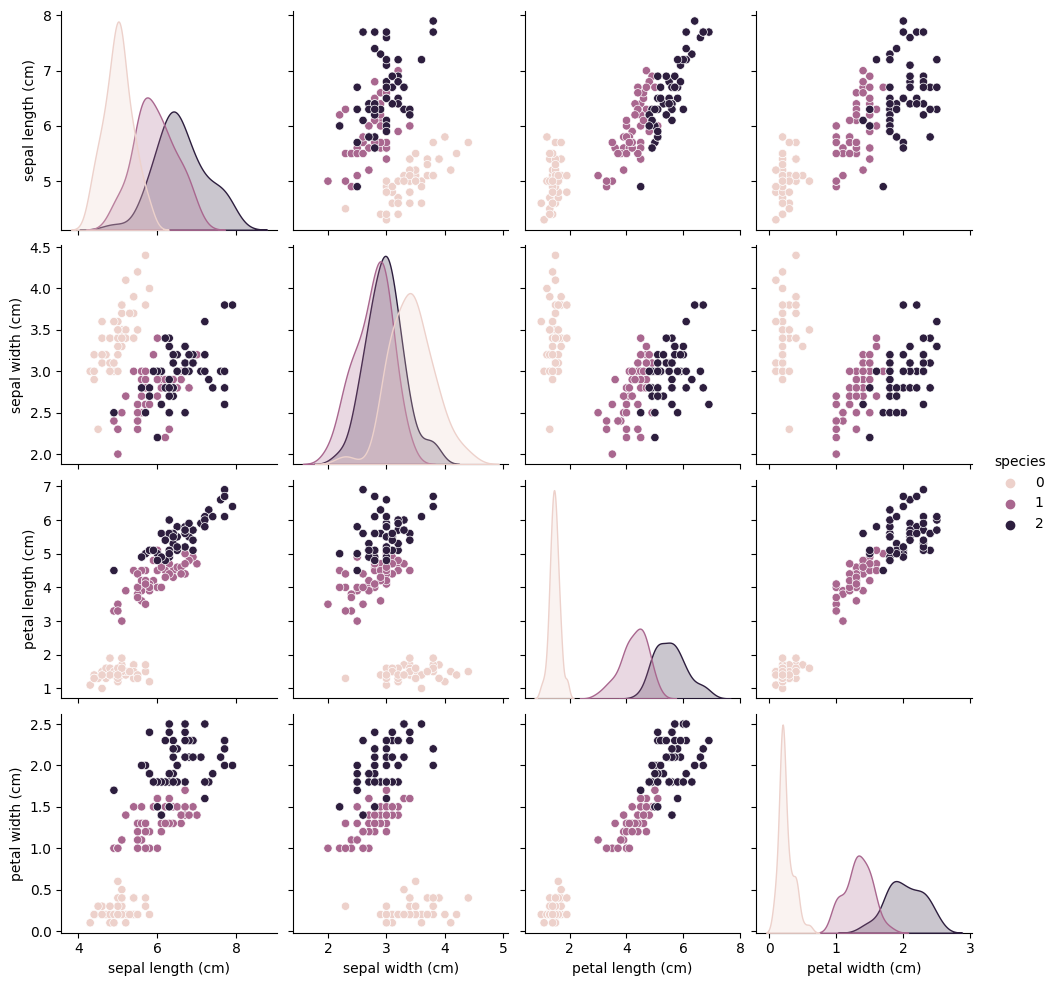

In [178]:
import seaborn as sns

sns.pairplot(df,hue='species')
plt.show()

In [185]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


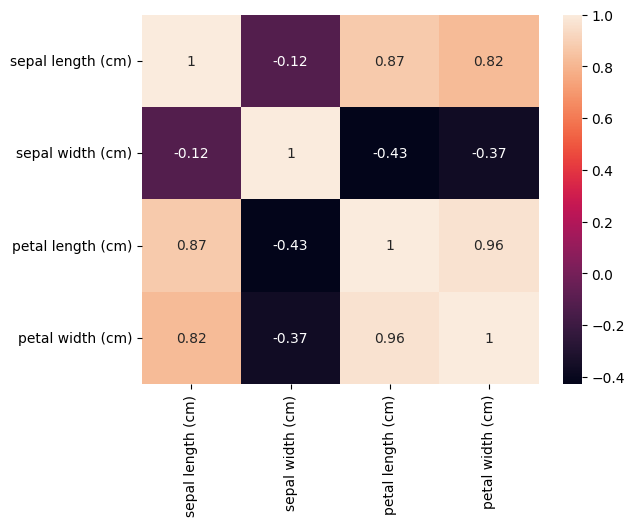

In [188]:
sns.heatmap(df.drop(['species'],axis=1).corr(),annot=True)
plt.show()

In [180]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

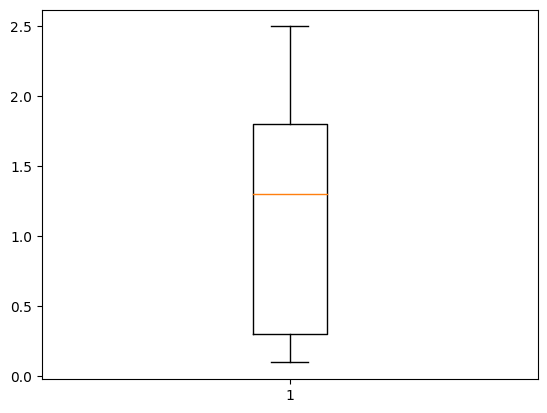

In [184]:
plt.boxplot(df['petal width (cm)'])
plt.show()

In [15]:
df.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [190]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [191]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [192]:
X = df.drop(['species'],axis=1)

In [193]:
y = df['species']

In [194]:
from sklearn.model_selection import train_test_split

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [203]:
X_train_std = (X_train-X_train.mean())/X_train.std()
X_test_std = (X_test-X_test.mean())/X_test.std()

In [201]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [204]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_std,y_train)
y_pred_train = knn.predict(X_train_std)
y_pred_test = knn.predict(X_test_std)

In [205]:
print(accuracy_score(y_pred_train,y_train))
print(accuracy_score(y_pred_test,y_test))

0.9619047619047619
0.9777777777777777


## k-means senza stardizzazione

In [17]:
X = df.drop(['species'],axis=1)

In [21]:
from sklearn.cluster import KMeans

In [29]:
iris_kmeans = KMeans(n_clusters=3)

In [30]:
iris_kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [31]:
labels = iris_kmeans.predict(X)

In [32]:
centroids = iris_kmeans.cluster_centers_

In [33]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


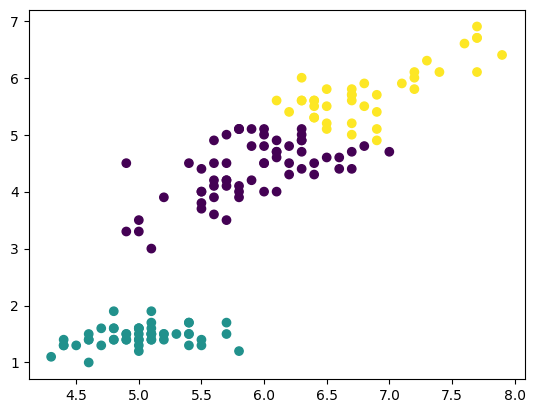

In [34]:
plt.scatter(X['sepal length (cm)'],X['petal length (cm)'],c=labels)
plt.show()

In [35]:
l_wcss = []

for k in range(1,10):
   kmeans = KMeans(n_clusters=k,random_state=123)
   kmeans.fit(X)
   l_wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

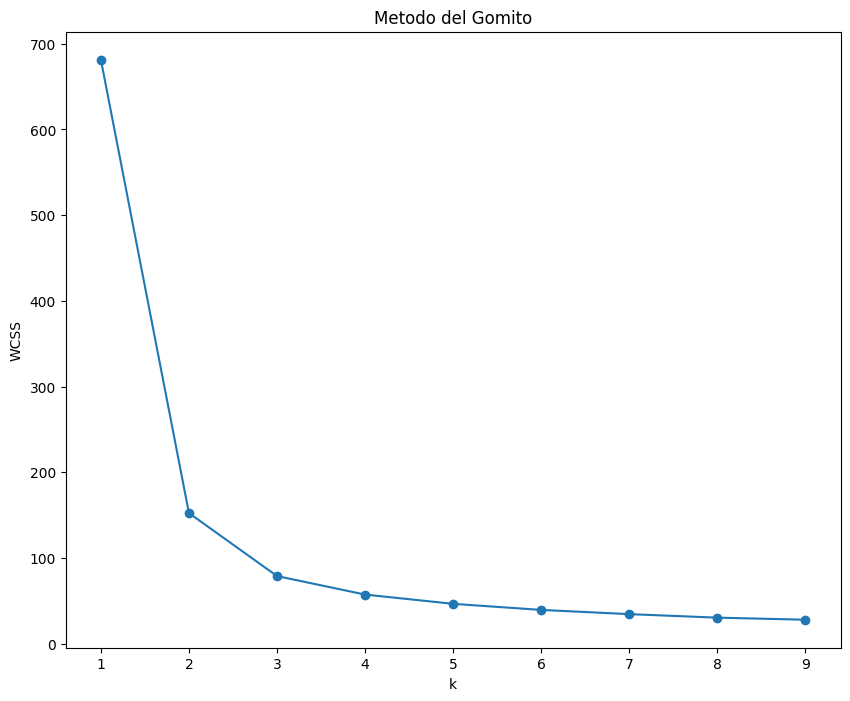

In [36]:
plt.figure(figsize=(10,8))

plt.title('Metodo del Gomito')

plt.plot(range(1,10),l_wcss,marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

## k-means con standardizzazione

In [39]:
type(X.mean())

pandas.core.series.Series

In [38]:
X.std()

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

In [40]:
X_std = (X-X.mean())/X.std()

In [43]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [44]:
X_std.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.515825e-15,-1.894781e-15,-1.515825e-15,-8.526513e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.863780e+00,-2.425820e+00,-1.562342e+00,-1.442245e+00
25%,-8.976739e-01,-5.903951e-01,-1.222456e+00,-1.179859e+00
50%,-5.233076e-02,-1.315388e-01,3.353541e-01,1.320673e-01
75%,6.722490e-01,5.567457e-01,7.602115e-01,7.880307e-01
max,2.483699e+00,3.080455e+00,1.779869e+00,1.706379e+00


In [45]:
l_wcss = []

for k in range(1,10):
   kmeans_std = KMeans(n_clusters=k,random_state=123)
   kmeans_std.fit(X_std)
   l_wcss.append(kmeans_std.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [46]:
labels = kmeans_std.labels_

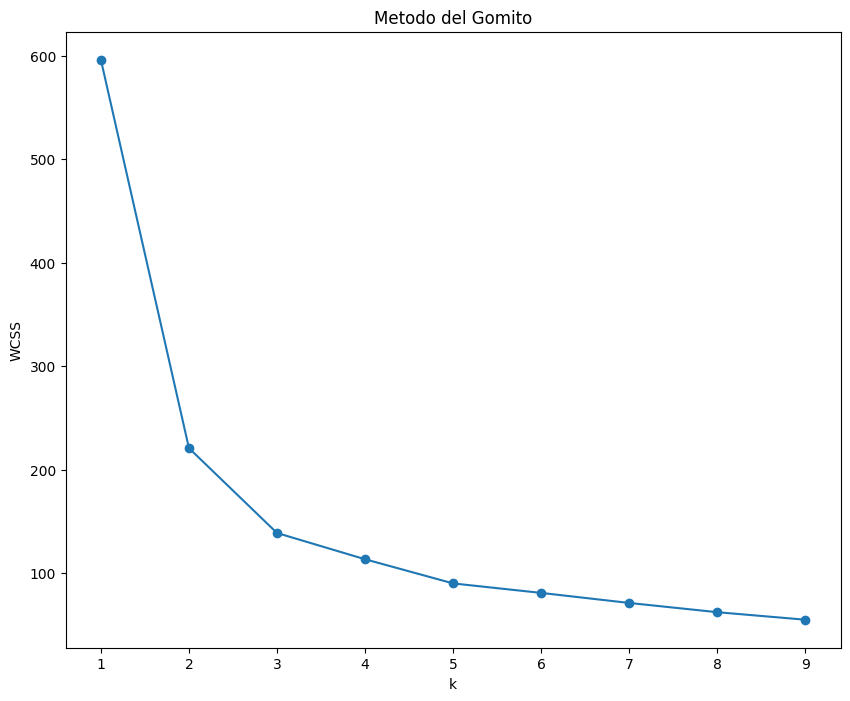

In [48]:
plt.figure(figsize=(10,8))
plt.title('Metodo del Gomito')

plt.plot(range(1,10),l_wcss,marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

In [60]:
kmeans3 = KMeans(n_clusters=3,random_state=123)
kmeans3.fit(X_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=123)

In [61]:
cluster_labels = kmeans3.labels_

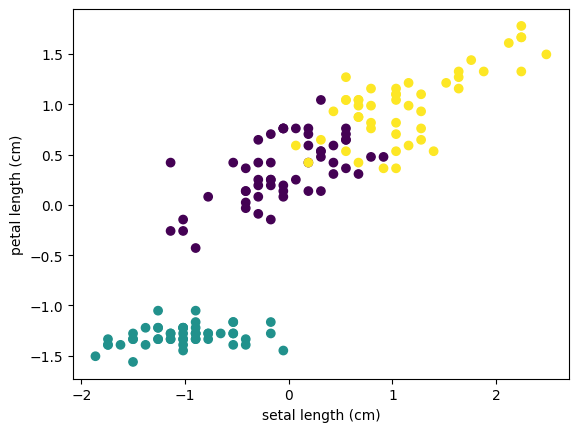

In [62]:
plt.scatter(X_std['sepal length (cm)'],X_std['petal length (cm)'],c=cluster_labels)
plt.xlabel('setal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

## kmeans con 2 features

In [65]:
X_std2 = X_std.drop(['sepal width (cm)','petal length (cm)'],axis=1)

In [68]:
l_wcss =  []
for k in range(1,10):
    kmeans2 = KMeans(n_clusters=k,random_state=123)
    kmeans2.fit(X_std2)
    l_wcss.append(kmeans2.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

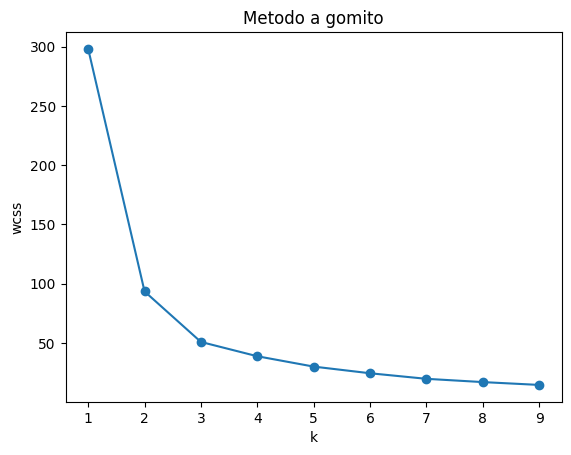

In [69]:
plt.title('Metodo a gomito')
plt.plot(range(1,10),l_wcss,marker='o')
plt.xlabel('k')
plt.ylabel('wcss')
plt.show()

In [70]:
kmeans2 = KMeans(n_clusters=3,random_state=123)
kmeans2.fit(X_std2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=123)

In [73]:
cluster_labels = kmeans2.labels_

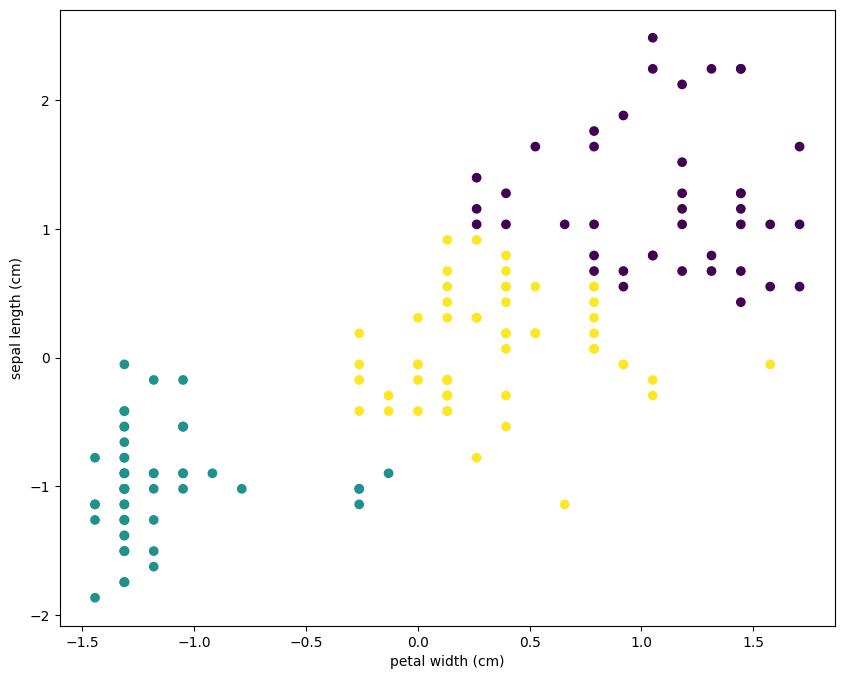

In [92]:
plt.figure(figsize=(10,8))
plt.scatter(X_std2['sepal length (cm)'],X_std2['petal width (cm)'],c=cluster_labels)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

## DBSCAN

In [75]:
from sklearn.cluster import DBSCAN

In [88]:
dbscan = DBSCAN(eps=0.4,min_samples=3)
dbscan.fit(X_std2)

DBSCAN(eps=0.4, min_samples=3)

In [89]:
X_std2

,sepal length (cm),petal width (cm)
0,-0.897674,-1.311052
1,-1.139200,-1.311052
2,-1.380727,-1.311052
3,-1.501490,-1.311052
4,-1.018437,-1.311052
...,...,...
145,1.034539,1.443994
146,0.551486,0.919223
147,0.793012,1.050416
148,0.430722,1.443994


In [90]:
dbscan_labels = dbscan.labels_

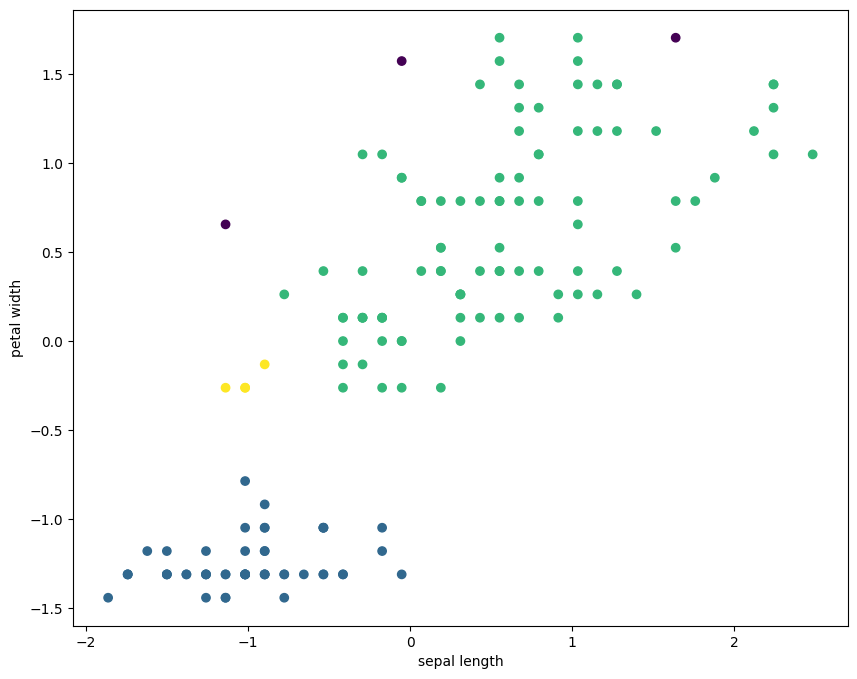

In [93]:
plt.figure(figsize=(10,8))
plt.scatter(X_std2['sepal length (cm)'],X_std2['petal width (cm)'],c=dbscan_labels)
plt.xlabel('sepal length')
plt.ylabel('petal width')
plt.show()

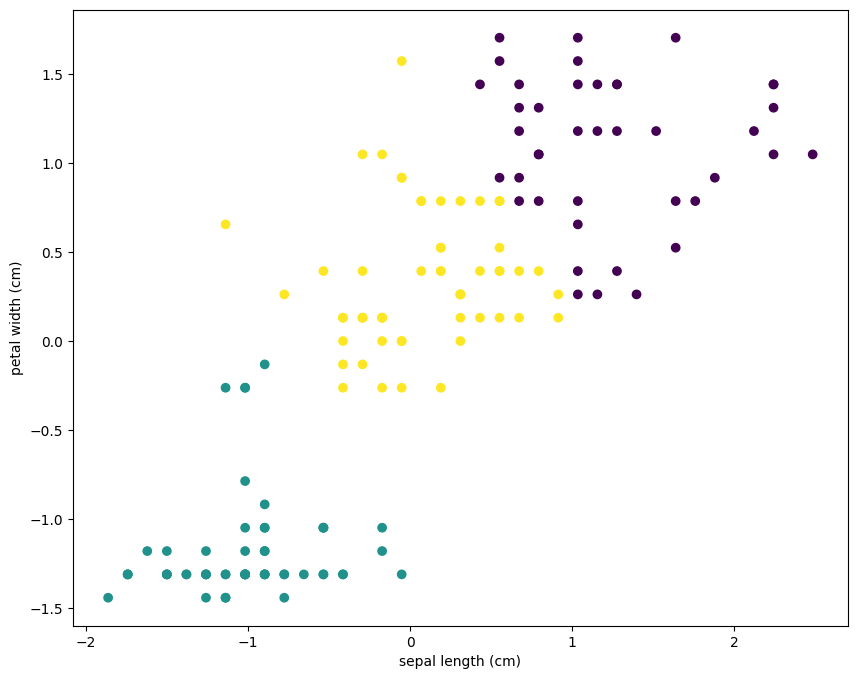

In [94]:
plt.figure(figsize=(10,8))
plt.scatter(X_std2['sepal length (cm)'],X_std2['petal width (cm)'],c=cluster_labels)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

## customer segmentation

In [120]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [121]:
df.rename(columns={'Annual Income (k$)':'Annual Income','Spending Score (1-100)':'Spending Score'},inplace=True)

In [122]:
df.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [123]:
X = df[['Spending Score','Annual Income']]

In [124]:
X_std = (X-X.mean())/X.std()

In [126]:
X_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Spending Score  200 non-null    float64
 1   Annual Income   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


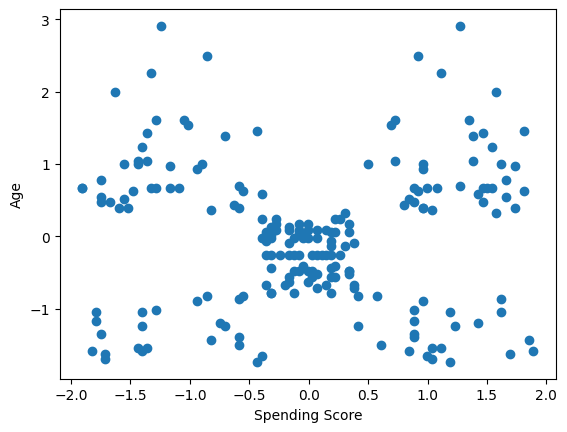

In [127]:
plt.scatter(X_std['Spending Score'],X_std['Annual Income'])
plt.xlabel('Spending Score')
plt.ylabel('Age')
plt.show()

### kmeans

In [128]:
kmeans5 = KMeans(n_clusters=5,random_state=123)
kmeans5.fit(X_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=123)

In [129]:
cluster_labels = kmeans5.labels_

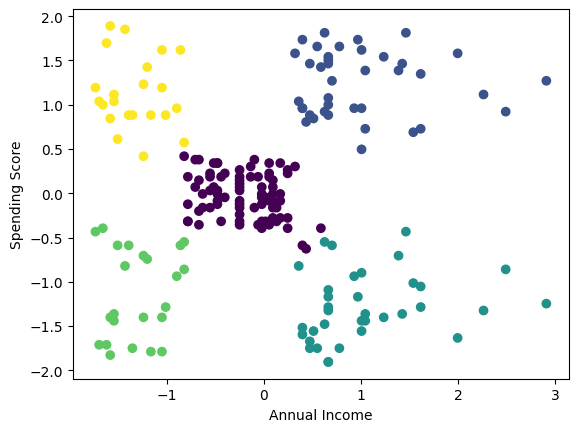

In [131]:
plt.scatter(X_std['Annual Income'],X_std['Spending Score'],c=cluster_labels)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [132]:
l_wcss = []
for k in range(1,10):
   kmeans_k = KMeans(n_clusters=k, random_state=123)
   kmeans_k.fit(X_std)
   l_wcss.append(kmeans_k.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

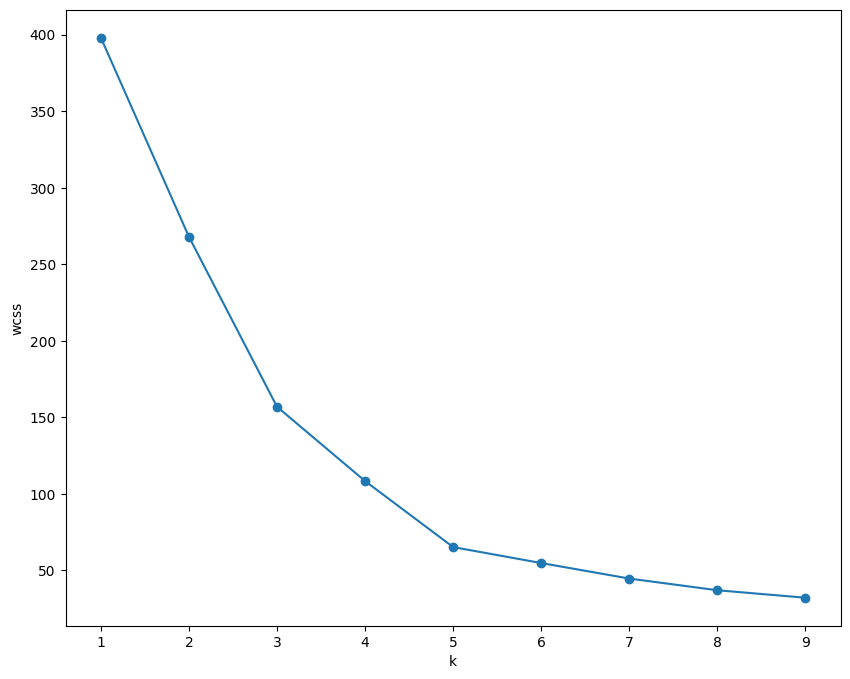

In [138]:
plt.figure(figsize=(10,8))
plt.plot(range(1,10),l_wcss,marker='o')
plt.xlabel('k')
plt.ylabel('wcss')
plt.show()

### DBSCAN

In [141]:
X_std

,Spending Score,Annual Income
0,-0.433713,-1.734646
1,1.192711,-1.734646
2,-1.711618,-1.696572
3,1.037814,-1.696572
4,-0.394989,-1.658498
...,...,...
195,1.115262,2.263112
196,-0.859681,2.491555
197,0.921640,2.491555
198,-1.246925,2.910368


In [164]:
dbscan = DBSCAN(eps=0.4,min_samples=4)
dbscan.fit(X_std)

DBSCAN(eps=0.4, min_samples=4)

In [165]:
dbscan_labels = dbscan.labels_

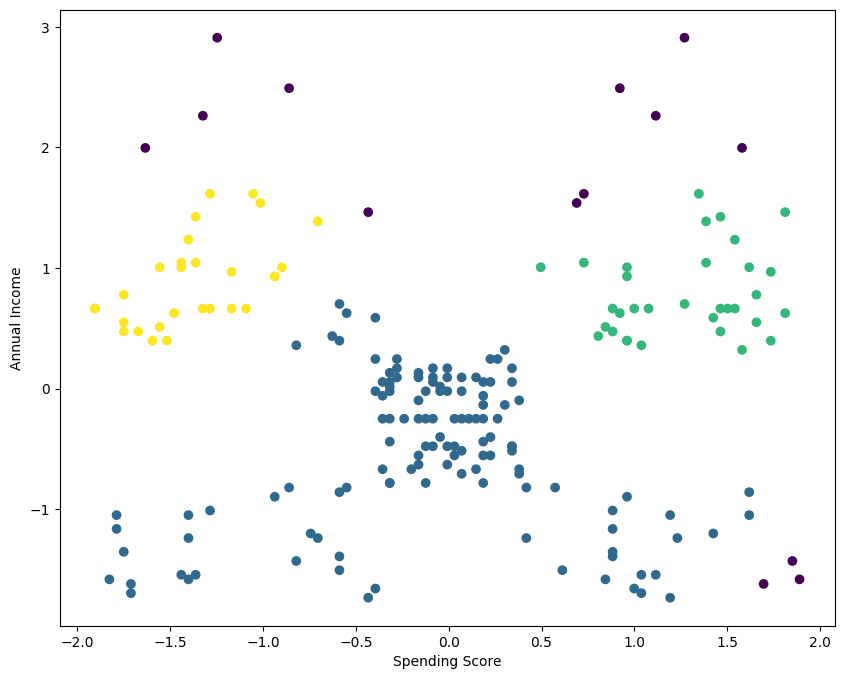

In [166]:
plt.figure(figsize=(10,8))
plt.scatter(X_std['Spending Score'],X_std['Annual Income'],c=dbscan_labels)
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.show()